William Craig

MFG 598

Exam 3

April 6, 2023

In [6]:
import numpy as np

#Starting with blank matrix. Could use matrix of ones,
    #but it would be more work to change all the border edges to 0 individually.
border_matrix = np.ones((10,10))

#Using a slicing operator here on [rows, columns]
#'starts at 1 (not the edge), ends '1' away from the edge.
border_matrix[1:-1, 1:-1] = 1

print(border_matrix)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
#I started by assuming we want integers, but 0.6 implies a uniform distribution of floats.
# random_int_mat = np.random.randint(-1, 1, size = (8, 6))
random_mat = np.random.uniform(-1, 1, size = (8,6))

#Used np.where inspired by homework 5 solutions.
positive_mat = np.where(random_mat < 0, -random_mat, random_mat)

#Uses indexing to look at each row of the matrix
#trying to find smallest absolute value difference, then taking the argmin of all the abs values.
#axis = 1 constrains to horizontal.
#arange creates 1D array, so good place to start.
eight_by_one = positive_mat[np.arange(len(positive_mat)), abs(positive_mat - 0.6).argmin(axis=1)]



print(f"{random_mat}\n")
print(f"{positive_mat}\n")
print(f"{eight_by_one}\n")

[[-0.72010598  0.13803007 -0.63407124 -0.80304916  0.25354055  0.1308448 ]
 [ 0.45538139 -0.59515162 -0.45110428 -0.0620063   0.47326981  0.89136983]
 [ 0.05395029 -0.23821694 -0.17509293  0.58169272 -0.2733631  -0.54518521]
 [ 0.36683761 -0.99561887 -0.36345298  0.4007951   0.53947868 -0.60633646]
 [ 0.1667545   0.18379226 -0.55258523  0.76849791 -0.87859238  0.45179751]
 [-0.63690046  0.90861416 -0.28717471  0.84264187 -0.43595774  0.23399608]
 [-0.81717313 -0.24095839 -0.03910604  0.9046029   0.38632018  0.66916803]
 [ 0.30124468  0.03513581 -0.72447601  0.3514095  -0.87526503  0.66674562]]

[[0.72010598 0.13803007 0.63407124 0.80304916 0.25354055 0.1308448 ]
 [0.45538139 0.59515162 0.45110428 0.0620063  0.47326981 0.89136983]
 [0.05395029 0.23821694 0.17509293 0.58169272 0.2733631  0.54518521]
 [0.36683761 0.99561887 0.36345298 0.4007951  0.53947868 0.60633646]
 [0.1667545  0.18379226 0.55258523 0.76849791 0.87859238 0.45179751]
 [0.63690046 0.90861416 0.28717471 0.84264187 0.43595

In [36]:
import zipfile
import os
import pandas as pd

#opening with zipfile, not sure if required.
json_dataframe = pd.DataFrame(columns = ['filename', 'abstract', 'identifier', 'publicationDate'])
with zipfile.ZipFile('Exam2-Abstracts_Collection-1.zip') as zip_file:
    file_names = zip_file.namelist()

#A bit messy to include the file names with the folder names, 
#but the added overhead is minimal.
    for filename in file_names:
        if os.path.isdir(filename):
            file_names.append(filename)
            continue

    # print(file_names)

    for item in file_names:
        if item.endswith('.json'):
            with zip_file.open(item) as json_file:
                #got an error here. Realized I need the json_file instead of item for pd.read_json
                # json_data = pd.read_json(item)
                json_data = pd.read_json(json_file)
                data = pd.json_normalize(json_data)
                # print(data)
                #Need double brackets to select multiple columns! Messed this up initially.
                json_dataframe.append(data[['filename', 'abstract', 'identifier', 'publicationDate']])

all_json_data = pd.concat(json_dataframe, ignore_index = True)



ValueError: All arrays must be of the same length

ym = 0.1253719713981754


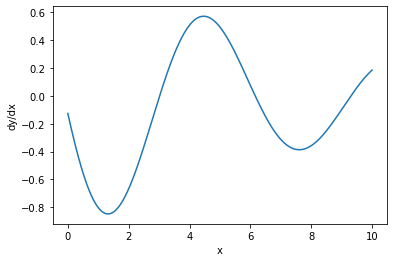

In [71]:
import numpy as np
#Almost forgot to specify pyplot here!
import matplotlib.pyplot as plt
#Specified number of intervals implies linspace.
x = np.linspace(0,10,5000)
#Defining function:
y = np.exp(-x/8) * np.cos(x)

ym = np.percentile(y, 60)

print(f"ym = {ym}")

derivative = np.gradient(y, x)

# Plot dy/dx vs x
plt.plot(x, derivative)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.show()



In [90]:
import numpy as np
import pandas as pd

gradesDF = pd.read_csv('grades2-1.csv')

#This did not work as the value appears to be a hyphen and not NaN
# gradesDF.fillna(0)
print(gradesDF.head())
#Can you think of a more elegant way to do this?
#This is all that came to mind.
gradesDF['Exam1-1'] = gradesDF['Exam1-1'].str.replace('-', '0')
gradesDF['Exam1-2'] = gradesDF['Exam1-2'].str.replace('-', '0')
gradesDF['Exam1-3'] = gradesDF['Exam1-3'].str.replace('-', '0')
print(gradesDF.head())

#double brackets to add multiple columns. Will then pass arguments in.
gradesDF[['Average Score', 'Improvement Ratio']] = 0,0

print(gradesDF.head())

gradesDF['Average Score'] = gradesDF.mean(axis=1)
print(gradesDF.head())

def calculate_improvement_ratio(row):
    exam1_1 = row['Exam1-1']
    exam1_2 = row['Exam1-2']
    improvement = (exam1_2 - exam1_1) / exam1_1 * 100
    return improvement

gradesDF['Improvement Ratio'] = gradesDF.apply(calculate_improvement_ratio, axis=1)

print(gradesDF.head())

   Student ID Exam1-1 Exam1-2 Exam1-3
0         100     100      20     100
1         101      36       -       -
2         102      25      88       -
3         103      20      65       -
4         104      21       -       -
   Student ID Exam1-1 Exam1-2 Exam1-3
0         100     100      20     100
1         101      36       0       0
2         102      25      88       0
3         103      20      65       0
4         104      21       0       0
   Student ID Exam1-1 Exam1-2 Exam1-3  Average Score  Improvement Ratio
0         100     100      20     100              0                  0
1         101      36       0       0              0                  0
2         102      25      88       0              0                  0
3         103      20      65       0              0                  0
4         104      21       0       0              0                  0
   Student ID Exam1-1 Exam1-2 Exam1-3  Average Score  Improvement Ratio
0         100     100      20     100   

C:\Users\WTCra\AppData\Local\Temp\ipykernel_1464\1912637616.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gradesDF['Average Score'] = gradesDF.mean(axis=1)


TypeError: unsupported operand type(s) for -: 'str' and 'str'